## Урок 1

### Алгоритм линейной регрессии. Градиентный спуск.

#### 1. Подберите скорость обучения (alpha) и количество итераций:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
X.shape

(2, 10)

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

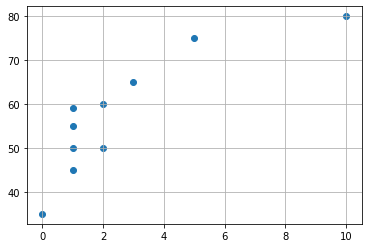

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[1], y)
plt.grid()

# import pylab
# import scipy.stats as stats
# stats.probplot(y, dist='norm', plot=pylab)
# pylab.show()

In [6]:
n = X.shape[1] #10
W = np.array([1, 0.5])
W

array([1. , 0.5])

In [7]:
# счетчик итераций
iter_num = 0

# список значений ошибок после каждой итерации
min_error = 0.0001
errors = [0]

max_iter = 5000

mn = 50

while iter_num != max_iter:
    # подберем скорость обучения, которая будет уменьшаться в зависимости от кол-во итераций
    alpha = 1 / min(iter_num + 1, mn)
    
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    
    errors.append(err)
    err_diff = abs(errors[iter_num + 1] - errors[iter_num])
    
    if (err_diff > min_error):
        for ii in range(W.shape[0]):
            W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
        if iter_num % 5 == 0:
            print(alpha, iter_num, W, err)
        
        iter_num += 1
    if (err_diff < min_error) or (iter_num > max_iter):
        print('------------------------------------------------')
        print(f'Количество итераций {iter_num + 1}(расчет с нуля), alpha = {round(alpha, 5)}, Вектор весов = {W}, ошибка = {err}')
        break
        

1.0 0 [111.2 340.5] 3173.15
0.16666666666666666 5 [-1050894.82270827 -5691297.43635911] 31152312268987.992
0.09090909090909091 10 [7.95222356e+07 4.30646600e+08] 9.532193004142854e+17
0.0625 15 [-1.64017815e+08 -8.88226735e+08] 1.5707752715460112e+19
0.047619047619047616 20 [11164903.62541838 60462466.93479252] 2.996159052027899e+17
0.038461538461538464 25 [-10881.87319157 -59182.18430278] 2133633181461.4048
0.03225806451612903 30 [47.27978274  3.8987182 ] 46.14219839995496
------------------------------------------------
Количество итераций 34(расчет с нуля), alpha = 0.02941, Вектор весов = [47.27731493  3.90235709], ошибка = 45.9385971582095


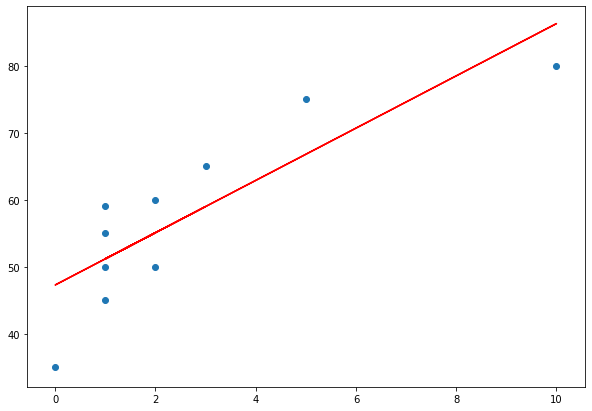

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
plt.plot(X[1], W[0] + W[1] * X[1], label="norm", color='red')
plt.scatter(X[1], y)

#### *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

формула вычисления градиента:
$$\nabla_{w}Q(w,X) = \frac{2}{n}X^{T}(Xw-y).$$

In [9]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

n = X.shape[1] #10
W = np.array([1, 0.5])
alpha = 0.01

for i in range(5000):  
    y_pred = np.dot(W, X.T)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    
#     ДАНА ФОРМУЛА: W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
#     ||
    # во второй задаче попробуем не изменять альфу, но добавить сигмоиду и исправить формулу(которая была дана в условии задачи)
    W -= alpha * np.sign(1/n * 2 * (X.T @ (y_pred - y)))
    
    # Если матрица будет уже транспонированной, то просто X (без X.T)
    # W -= alpha * (1/n * 2 * np.dot(X, y_pred - y))
    if i % 100 == 0:
        # еще альфу здесь можно фиксить
        # alpha /= 1.01
        print(i, alpha,  W, err)
        

0 0.01 [1.01 0.51] 3150.55
100 0.01 [2.01 1.51] 2680.75
200 0.01 [3.01 2.51] 2258.9500000000053
300 0.01 [4.01 3.51] 1885.150000000012
400 0.01 [5.01 4.51] 1559.3500000000165
500 0.01 [6.01 5.51] 1281.5500000000193
600 0.01 [7.01 6.51] 1051.7500000000202
700 0.01 [8.01 7.51] 869.9500000000189
800 0.01 [9.01 8.51] 736.1500000000156
900 0.01 [10.01  9.51] 650.3500000000103
1000 0.01 [11.01 10.03] 608.7872000000062
1100 0.01 [12.01  9.85] 576.6332000000067
1200 0.01 [13.01  9.67] 545.420800000007
1300 0.01 [14.01  9.51] 515.1500000000076
1400 0.01 [15.01  9.33] 485.820800000008
1500 0.01 [16.01  9.15] 457.4332000000084
1600 0.01 [17.01  8.97] 429.98680000000365
1700 0.01 [18.01  8.79] 403.4799999999997
1800 0.01 [19.01  8.61] 377.9147999999957
1900 0.01 [20.01  8.45] 353.2911999999921
2000 0.01 [21.01  8.27] 329.60919999998873
2100 0.01 [22.01  8.09] 306.8699999999857
2200 0.01 [23.01  7.91] 285.06879999998307
2300 0.01 [24.01  7.73] 264.20919999998057
2400 0.01 [25.01  7.55] 244.29119999